# Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.
Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать 
статистики заново, а брать их с трейна. Если хватает знаний, можно использовать кросс-валидацию,
но для сдачи этого проекта достаточно разбить данные из train.csv на train и valid.
9. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором 
большого количества сочетаний параметров.
10. Допускается применение библиотек Python и моделей машинного обучения,
которые были в курсе Python для Data Science. Градиентный бустинг изучается
в последующих курсах, поэтому в этом проекте его применять не следует.
Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.

### 1. Загрузка данных

#### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

#### Пути к директориям и файлам

In [2]:
DATASET_PATH = './train.csv'
PREPARED_DATASET_PATH = './train_prepared.csv'

**Описания полей датасета по недвижимости**

**Id** - идентификационный номер квартиры,

**DistrictId** - идентификационный номер района,

**Rooms** - количество комнат,

**Square** - площадь,

**LifeSquare** - жилая площадь,

**KitchenSquare** - площадь кухни,

**Floor** - этаж,

**HouseFloor** - количество этажей в доме,

**HouseYear** - год постройки дома,

**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности,

**Social_1, Social_2, Social_3** - социальные показатели местности,

**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья,

**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров,

**Price** - цена квартиры.

**Считываем данные. По строкам - наблюдения, по столбцам - признаки.**

In [3]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217


In [4]:
df.tail(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [5]:
df.sample()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8006,13384,70,2.0,50.479397,30.230722,8.0,18,22.0,1984,0.002212,B,B,39,7614,3,NaN,1,5,A,308191.036685


In [6]:
df.sample(frac=1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9370,8396,202,2.0,42.353485,30.661180,6.0,4,6.0,1933,0.000000,B,B,30,7538,87,4702.0,5,5,B,502085.860162
5822,10268,27,1.0,36.112393,1.855415,1.0,9,16.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,94881.691800
5984,3575,27,2.0,65.620926,1.819046,0.0,9,0.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,211345.630469
9473,13542,142,1.0,42.083584,20.817856,8.0,12,12.0,1979,0.051942,B,B,17,4017,7,800.0,2,0,B,192589.816374
584,12240,3,1.0,41.745151,19.137478,8.0,7,17.0,1983,0.050900,B,B,43,10621,1,30.0,2,3,B,153918.528247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,15766,97,1.0,41.530724,23.155538,10.0,4,16.0,1982,0.306977,B,B,27,5148,14,1575.0,5,7,B,188707.730368
5645,13105,35,1.0,42.348253,NaN,1.0,9,16.0,2015,0.089040,B,B,33,7976,5,NaN,0,11,B,209235.737420
1430,8827,15,1.0,41.446372,19.404299,7.0,9,14.0,2008,0.158249,B,B,21,5731,0,NaN,1,0,B,169057.512522
715,8745,1,3.0,85.146439,45.071181,10.0,8,22.0,2009,0.025609,B,B,33,5261,0,240.0,3,1,B,321975.364371


In [7]:
df.shape

(10000, 20)

In [8]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [10]:
df.Rooms

0       2.0
1       3.0
2       2.0
3       2.0
4       1.0
       ... 
9995    2.0
9996    1.0
9997    1.0
9998    2.0
9999    1.0
Name: Rooms, Length: 10000, dtype: float64

In [11]:
df[['Rooms', 'Square']]

,Rooms,Square
0,2.0,47.981561
1,3.0,65.683640
2,2.0,44.947953
3,2.0,53.352981
4,1.0,39.649192
...,...,...
9995,2.0,50.401785
9996,1.0,41.521546
9997,1.0,47.939008
9998,2.0,43.602562


In [12]:
df['Square'] > 50

0       False
1        True
2       False
3        True
4       False
        ...  
9995     True
9996    False
9997    False
9998    False
9999    False
Name: Square, Length: 10000, dtype: bool

In [13]:
df[df['Square'] > 50].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664


In [14]:
df[(df['Square'] > 50) & (df['Rooms'] > 4)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1422,4282,195,5.0,95.617533,62.377052,7.0,7,7.0,1940,0.015017,B,B,17,3079,59,2890.0,0,8,B,479525.147323
1503,1243,86,5.0,108.057398,82.723825,8.0,3,5.0,1942,0.161976,B,A,31,7010,5,4508.0,3,7,B,310305.074733
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


In [15]:
df[(df['Square'] > 50) | (df['Rooms'] > 4)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664


In [16]:
~(df['Rooms'] > 2)

0        True
1       False
2        True
3        True
4        True
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Rooms, Length: 10000, dtype: bool

In [17]:
df[~(df['Rooms'] > 2)].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377


In [18]:
tmp = df[~(df['Rooms'] > 2)]
tmp.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377


In [19]:
tmp.index

Int64Index([   0,    2,    3,    4,    6,    7,    8,    9,   10,   12,
            ...
            9985, 9986, 9987, 9988, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=7593)

In [20]:
tmp.loc[6]

Id                       14549
DistrictId                 154
Rooms                      2.0
Square               62.254114
LifeSquare           37.160377
KitchenSquare              7.0
Floor                        3
HouseFloor                 5.0
HouseYear                 1960
Ecology_1             0.460556
Ecology_2                    B
Ecology_3                    B
Social_1                    20
Social_2                  4386
Social_3                    14
Healthcare_1               NaN
Helthcare_2                  1
Shops_1                      5
Shops_2                      B
Price            296021.204377
Name: 6, dtype: object

In [21]:
tmp.iloc[0]

Id                      14038
DistrictId                 35
Rooms                     2.0
Square              47.981561
LifeSquare          29.442751
KitchenSquare             6.0
Floor                       7
HouseFloor                9.0
HouseYear                1969
Ecology_1             0.08904
Ecology_2                   B
Ecology_3                   B
Social_1                   33
Social_2                 7976
Social_3                    5
Healthcare_1              NaN
Helthcare_2                 0
Shops_1                    11
Shops_2                     B
Price            184966.93073
Name: 0, dtype: object

In [22]:
tmp.loc[:10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
10,15370,28,2.0,46.304907,27.922584,6.0,8,9.0,1973,0.118537,B,B,30,6207,1,1183.0,1,0,B,204243.553129


In [23]:
tmp.iloc[:5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377


In [24]:
tmp.iloc[-6:-1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9994,4158,23,2.0,64.864198,NaN,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808


Сводная таблица

In [25]:
pd.pivot_table(data=df,
               values='Rooms',
               index='Social_3',
               columns='Floor',
               aggfunc='mean')

Floor,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,31,32,33,37,42
Social_3,,,,,,,,,,,,,,,,,,,,,
0,1.800000,1.818182,1.789256,1.827451,1.791165,1.690821,1.941463,1.745946,1.804598,1.810976,...,1.636364,1.600000,1.6,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.761905,1.912088,1.891892,1.929348,1.966887,1.859060,1.811688,1.903704,1.874016,1.928571,...,2.000000,2.125000,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,1.916667,2.146341,1.822581,2.000000,1.914894,1.862745,1.760000,1.780000,2.189189,1.896552,...,2.000000,NaN,4.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
3,1.916667,1.850746,1.790476,1.888889,1.882353,1.865979,1.802632,1.888889,1.812500,1.818182,...,2.200000,2.333333,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000000,1.673469,2.000000,2.000000,1.800000,2.140351,1.927536,1.896552,1.888889,2.062500,...,1.642857,3.000000,2.4,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,1.916667,2.085714,2.027778,1.833333,1.882353,1.794118,2.344828,2.363636,2.352941,2.000000,...,2.600000,1.000000,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.800000,1.714286,2.102564,2.066667,1.655172,2.111111,2.047619,2.000000,1.884615,1.666667,...,1.600000,2.666667,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2.666667,1.923077,2.038462,2.028571,1.815789,2.166667,1.692308,1.875000,1.500000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.857143,2.133333,2.454545,1.913043,2.076923,2.076923,1.800000,2.000000,1.500000,1.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df[
    (df.Floor == 3)
    & (df.Social_3 == '84')
  ]['Rooms']#.mean()

Series([], Name: Rooms, dtype: float64)

### 2. Приведение типов данных

In [27]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [28]:
type(df.Square)

pandas.core.series.Series

In [29]:
df['Id'].dtype

dtype('int64')

In [30]:
df['Id'].values

array([14038, 15053,  4765, ...,  5123,  5400,  6306], dtype=int64)

In [31]:
type(df['Id'].values)

numpy.ndarray

In [32]:
df['Id'] = df['Id'].astype(str)
df['Id'].dtype

dtype('O')

#### Обзор количественных переменных

In [33]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644


In [34]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### Статистика

In [36]:
np.quantile(df['Rooms'], q=0.5)

2.0

In [37]:
df['Rooms'].median()

2.0

In [38]:
np.quantile(df['Rooms'], q=0.25)

1.0

In [39]:
df['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [40]:
df['Rooms'].mode()

0    2.0
Name: Rooms, dtype: float64

In [41]:
df['Rooms'].value_counts().index

Float64Index([2.0, 1.0, 3.0, 4.0, 5.0, 0.0, 10.0, 19.0, 6.0], dtype='float64')

In [42]:
df[df['Rooms'] == 2].shape

(3880, 20)

### Обзор номинативных переменных

In [43]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,14038,B,B,B
1,15053,B,B,B
2,4765,B,B,B
3,5809,B,B,B
4,10783,B,B,B


In [44]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [45]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [46]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [47]:
df['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [48]:
df['Ecology_2'].nunique()

2

### 3. Обработка данных

In [49]:
df.isna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9997,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [51]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [52]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df[['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor', 'Healthcare_1']].median()
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(self.medians)
                
        # 2. Выбросы (outliers)
        df.loc[(df['Rooms'] > np.quantile(df['Rooms'], q=0.975)) | (df['Rooms'] < np.quantile(df['Rooms'], q=0.025)), 'Rooms'] = df['Rooms'].median()
        df.loc[(df['Square'] > np.quantile(df['Square'], q=0.975)) | (df['Square'] < np.quantile(df['Square'], q=0.025)), 'Square'] = df['Square'].median()
        df.loc[(df['LifeSquare'] > np.quantile(df['LifeSquare'], q=0.975)) | (df['LifeSquare'] < np.quantile(df['LifeSquare'], q=0.025)), 'LifeSquare'] = df['LifeSquare'].median()
        df.loc[(df['KitchenSquare'] > np.quantile(df['KitchenSquare'], q=0.975)) | (df['KitchenSquare'] < np.quantile(df['KitchenSquare'], q=0.025)), 'KitchenSquare'] = df['KitchenSquare'].median()
        df.loc[(df['HouseFloor'] > np.quantile(df['HouseFloor'], q=0.975)) | (df['HouseFloor'] < np.quantile(df['HouseFloor'], q=0.035)), 'HouseFloor'] = df['HouseFloor'].median()
         
        # 3. Обработка категорий
        df = pd.concat([df, pd.get_dummies(df[['Ecology_2', 'Ecology_3', 'Shops_2']])], axis=1)

        return df

In [53]:
pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)

In [54]:
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [55]:
df.drop(columns='Id', inplace=True)

In [56]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.853000,55.108599,34.534440,5.536700,8.526700,12.815400,3.990166e+03,0.118858,24.687000,...,1026.358900,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,43.587592,0.756603,15.215053,11.451088,3.670668,5.241148,6.030154,2.005003e+05,0.119025,17.532614,...,746.662828,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.000000,1.000000,32.105270,15.146290,0.000000,1.000000,1.000000,1.910000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,42.432730,27.982505,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,...,830.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,...,900.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,75.000000,2.000000,64.591720,39.424685,8.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,...,990.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,209.000000,3.000000,100.904263,78.384631,13.000000,42.000000,25.000000,2.005201e+07,0.521867,74.000000,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=',')

In [58]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

### Уменьшение объема памяти, который занимает датасет

In [59]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [60]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.51 MB
Memory usage after optimization is: 0.70 MB
Decreased by 53.8%


### 4. Распределение целевой переменной

In [61]:
df.dtypes

DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
Ecology_2_A       float32
Ecology_2_B       float32
Ecology_3_A       float32
Ecology_3_B       float32
Shops_2_A         float32
Shops_2_B         float32
dtype: object

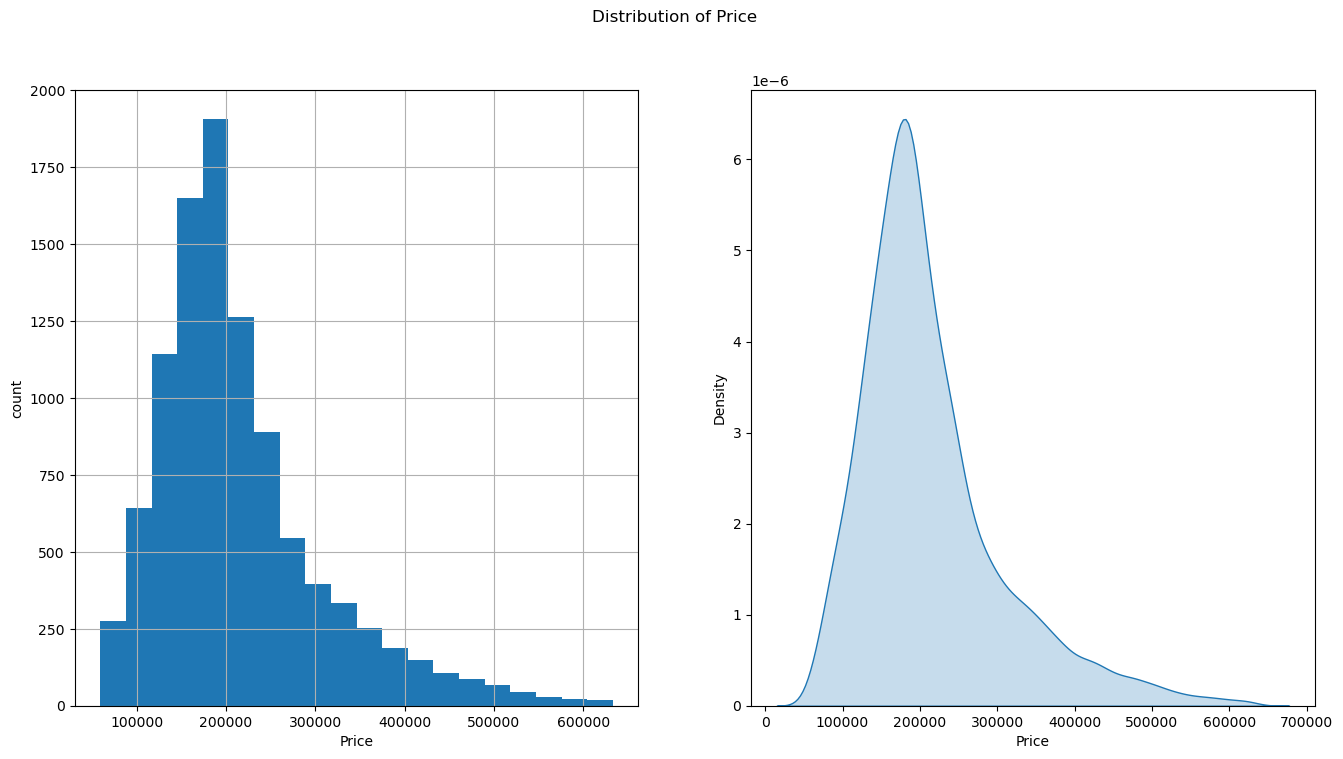

In [62]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [63]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

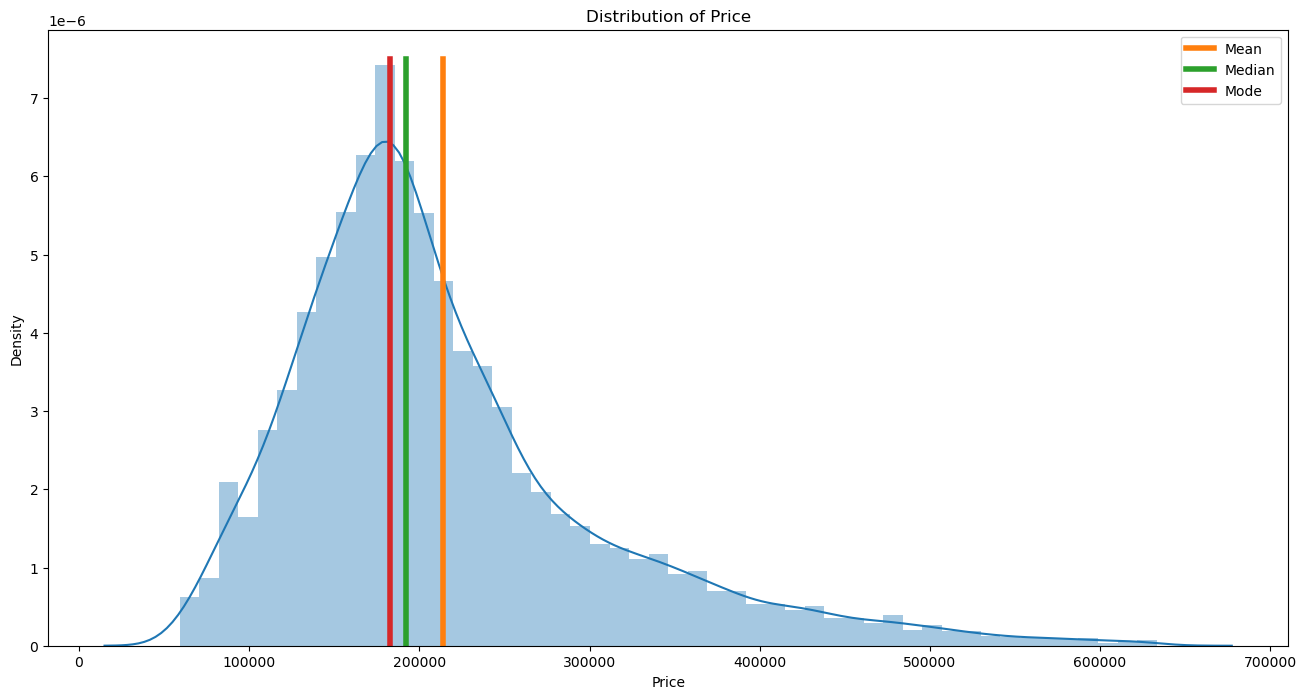

In [64]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.0000075, 10)
plt.plot([target_mean] * 10, y, label='Mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='Median',  linewidth=4)
plt.plot([target_mode] * 10, y, label='Mode', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

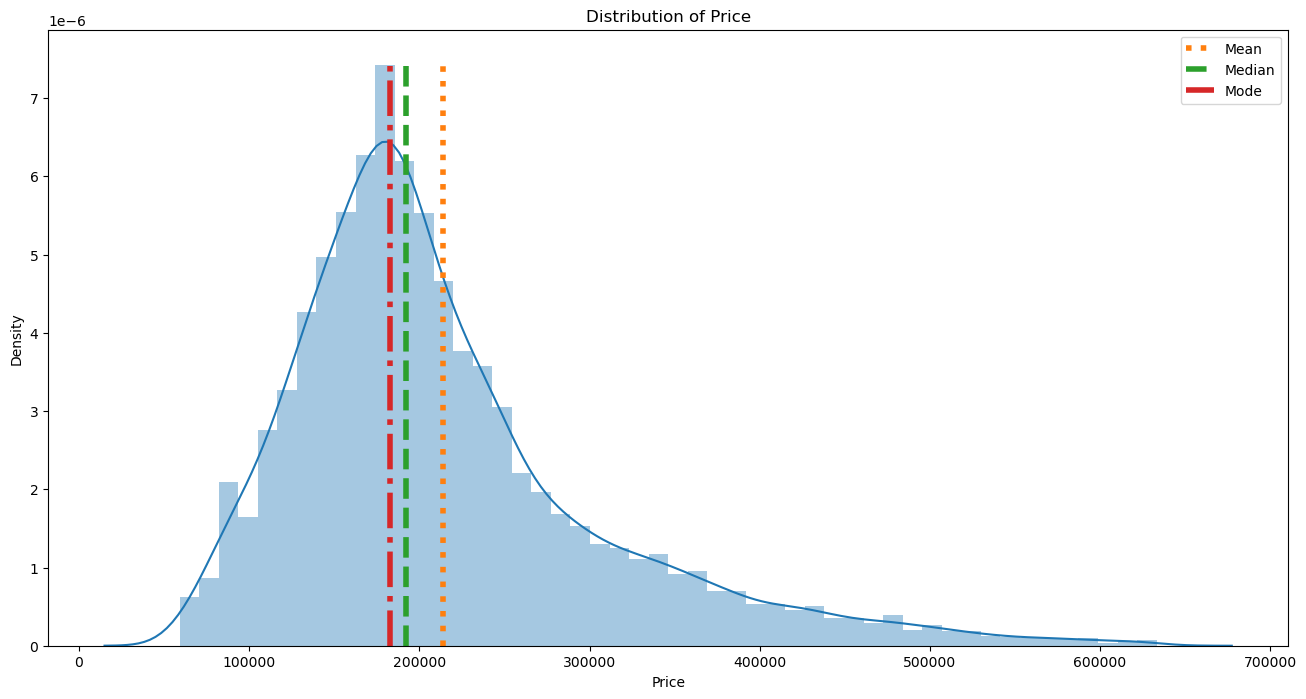

In [65]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.0000075, 10)
plt.plot([target_mean] * 10, y, label='Mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='Median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='Mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [66]:
target_bins = df['Price'] // 10000 * 10000
target_adjusted_mode = target_bins.mode()[0]
target_adjusted_mode

180000.0

In [67]:
df['Price'].value_counts()

182938.078125    2
238608.656250    2
204576.421875    2
298194.500000    2
277669.531250    1
                ..
475135.937500    1
242275.328125    1
205554.093750    1
169138.843750    1
218714.078125    1
Name: Price, Length: 9996, dtype: int64

In [68]:
target_bins

0       180000.0
1       300000.0
2       220000.0
3       170000.0
4       150000.0
          ...   
9995    190000.0
9996    180000.0
9997    150000.0
9998    180000.0
9999    210000.0
Name: Price, Length: 10000, dtype: float32

In [69]:
target_bins.value_counts().iloc[:10]

180000.0    740
170000.0    673
160000.0    614
190000.0    596
150000.0    543
200000.0    517
140000.0    495
210000.0    469
130000.0    435
220000.0    373
Name: Price, dtype: int64

In [70]:
len(np.unique(target_bins))

59

In [71]:
np.unique(target_bins)

array([ 50000.,  60000.,  70000.,  80000.,  90000., 100000., 110000.,
       120000., 130000., 140000., 150000., 160000., 170000., 180000.,
       190000., 200000., 210000., 220000., 230000., 240000., 250000.,
       260000., 270000., 280000., 290000., 300000., 310000., 320000.,
       330000., 340000., 350000., 360000., 370000., 380000., 390000.,
       400000., 410000., 420000., 430000., 440000., 450000., 460000.,
       470000., 480000., 490000., 500000., 510000., 520000., 530000.,
       540000., 550000., 560000., 570000., 580000., 590000., 600000.,
       610000., 620000., 630000.], dtype=float32)

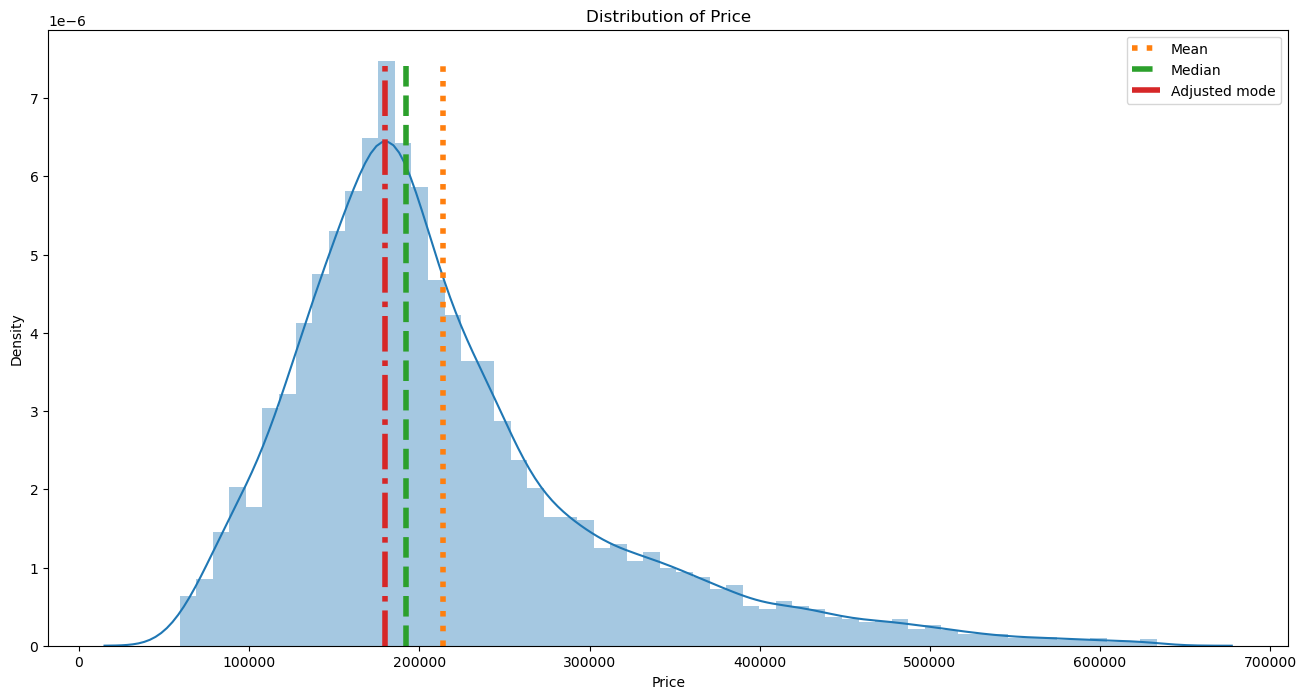

In [72]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=59) 

y = np.linspace(0, 0.0000075, 10)
plt.plot([target_mean] * 10, y, label='Mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='Median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='Adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### 5. Анализ признаков

### 5.1 Количественные признаки

In [73]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('Price', axis=1, inplace=True)

In [74]:
df_num_features

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Healthcare_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,2.0,47.981560,29.442751,6.0,9.0,0.089040,900.0,0.0,1.0,0.0,1.0,0.0,1.0
1,3.0,65.683640,40.049541,8.0,9.0,0.000070,240.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2.0,44.947952,29.197611,0.0,12.0,0.049637,229.0,0.0,1.0,0.0,1.0,0.0,1.0
3,2.0,53.352982,52.731510,9.0,17.0,0.437885,1084.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,39.649193,23.776169,7.0,12.0,0.012339,2078.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,50.401787,30.476204,5.0,5.0,0.135650,350.0,0.0,1.0,0.0,1.0,0.0,1.0
9996,1.0,41.521545,20.539215,9.0,13.0,0.000000,900.0,0.0,1.0,0.0,1.0,1.0,0.0
9997,1.0,47.939007,32.781261,1.0,16.0,0.072158,900.0,0.0,1.0,0.0,1.0,1.0,0.0
9998,2.0,43.602562,33.840149,8.0,5.0,0.307467,325.0,0.0,1.0,1.0,0.0,0.0,1.0


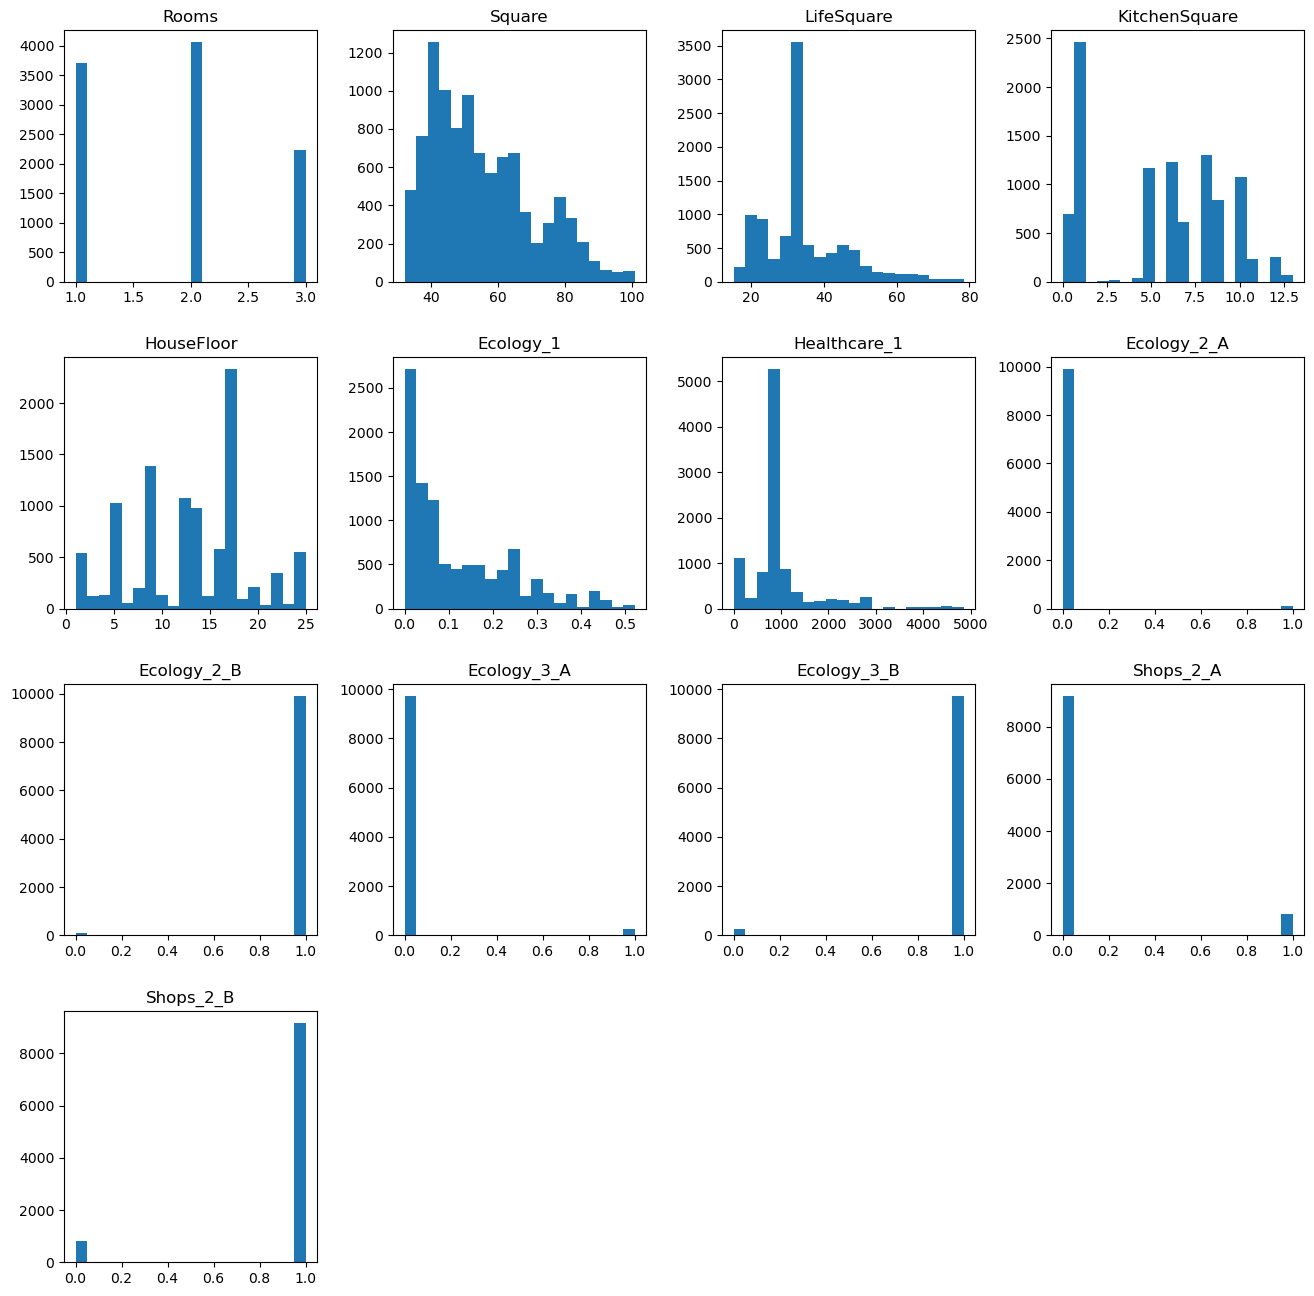

In [75]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

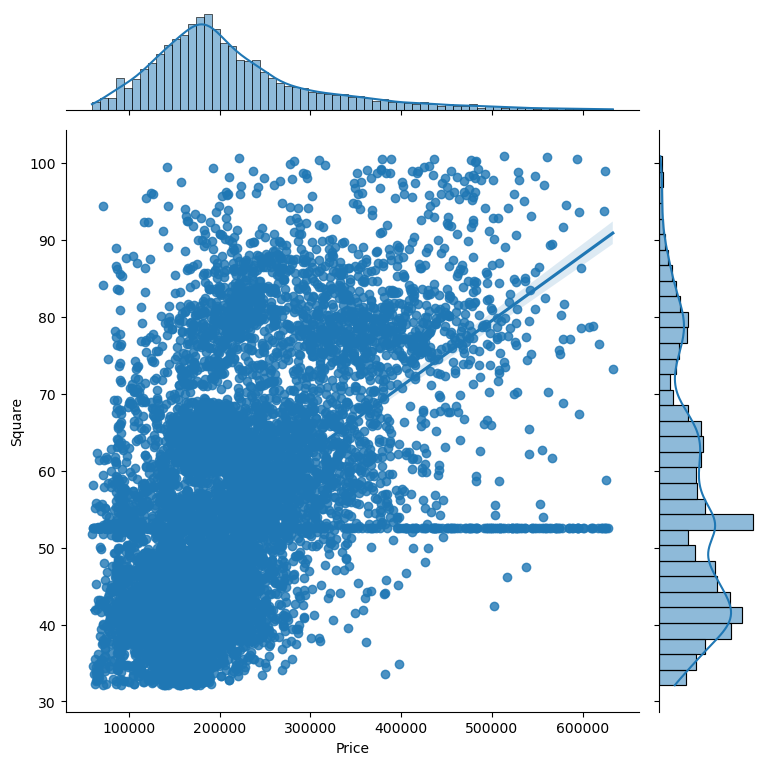

In [76]:
grid = sns.jointplot(df['Price'], df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

### 5.2 Матрица корреляций

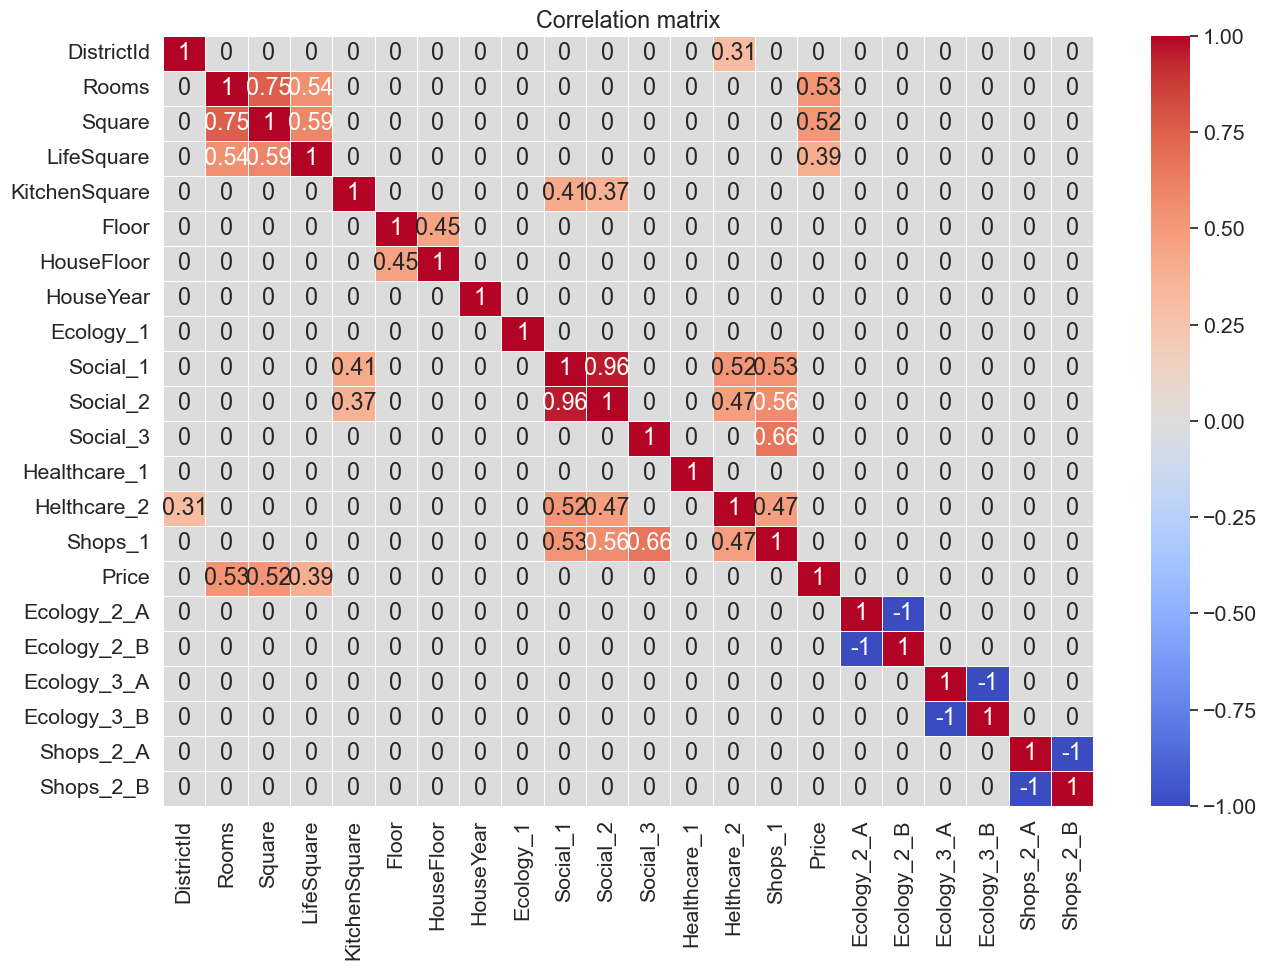

In [77]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

### 6. Анализ зависимости таргета от фичей

### 6.1 Количественные признаки

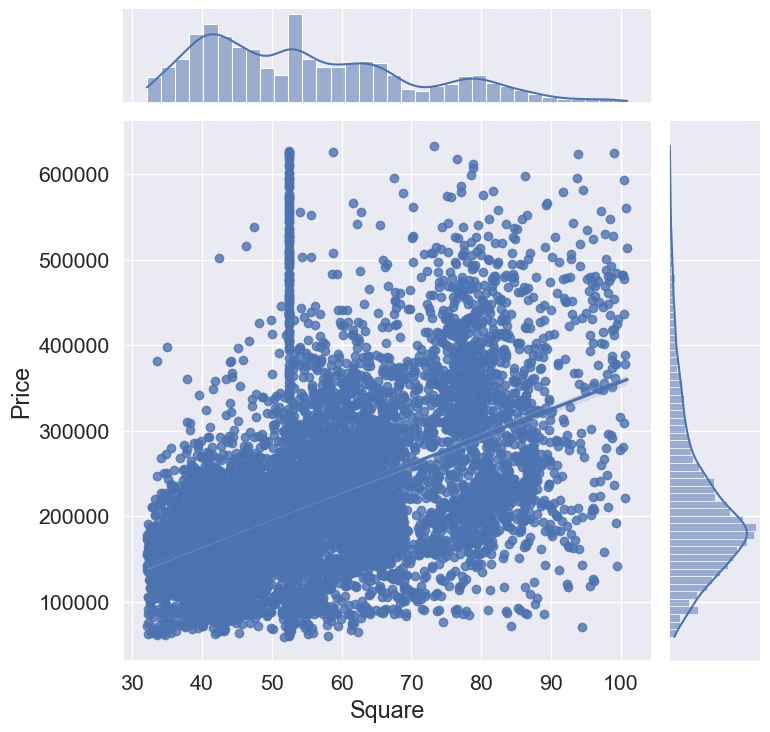

In [78]:
grid = sns.jointplot(df['Square'], df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

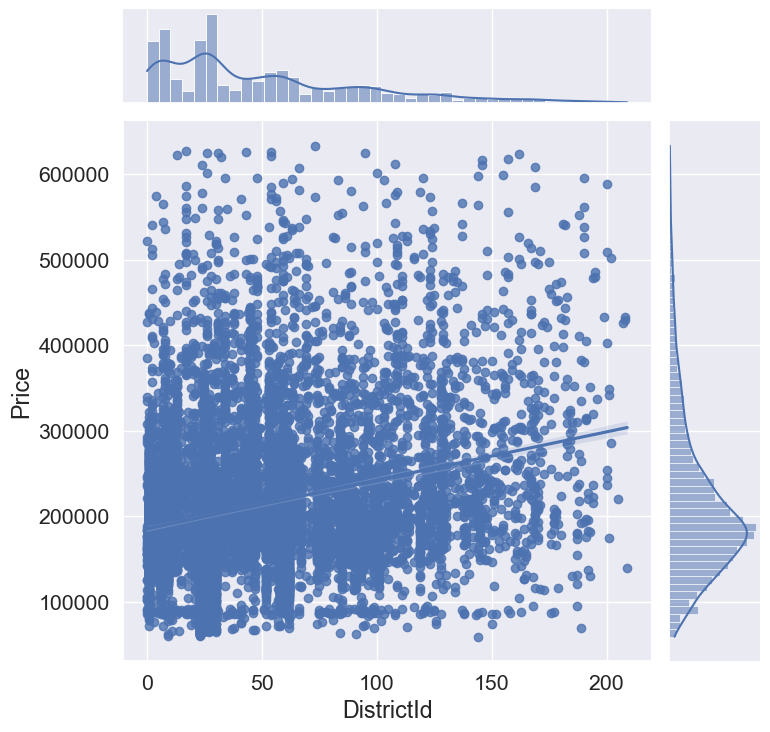

In [79]:
grid = sns.jointplot(df['DistrictId'], df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

### 6.2 Категориальные / бинарные признаки

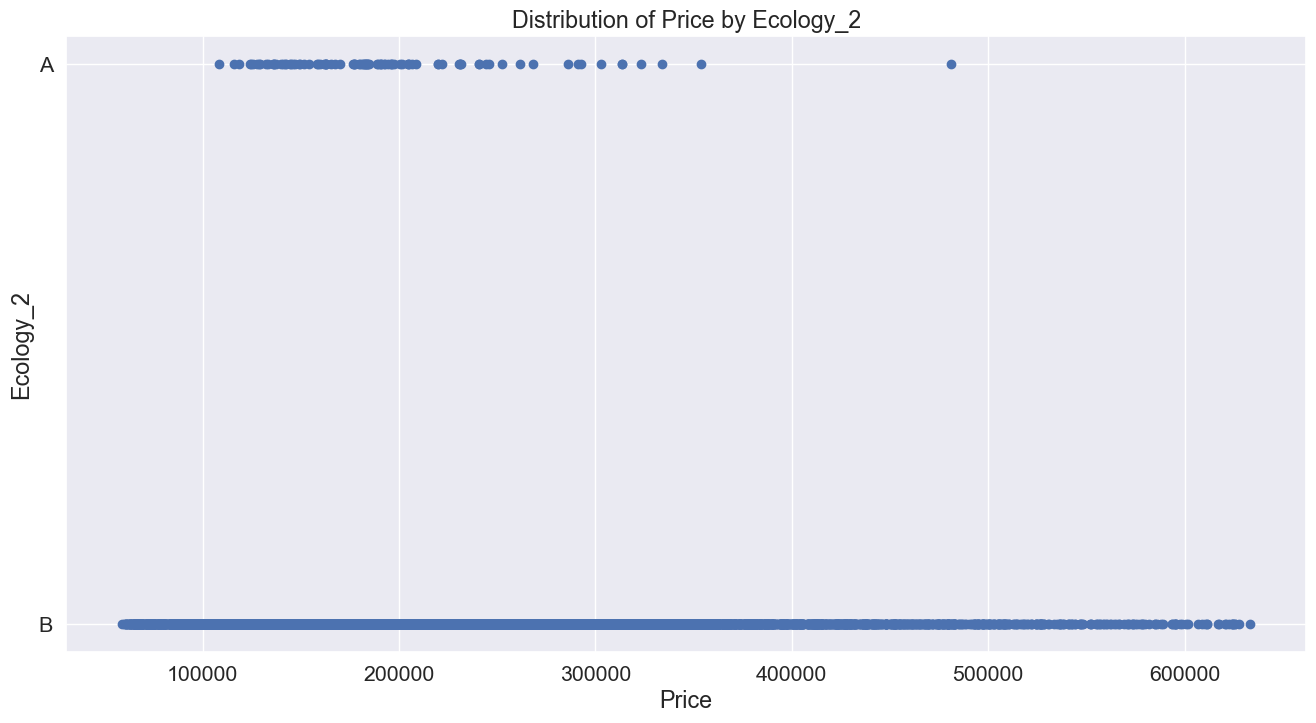

In [80]:
plt.figure(figsize=(16, 8))

plt.scatter(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

### box plot

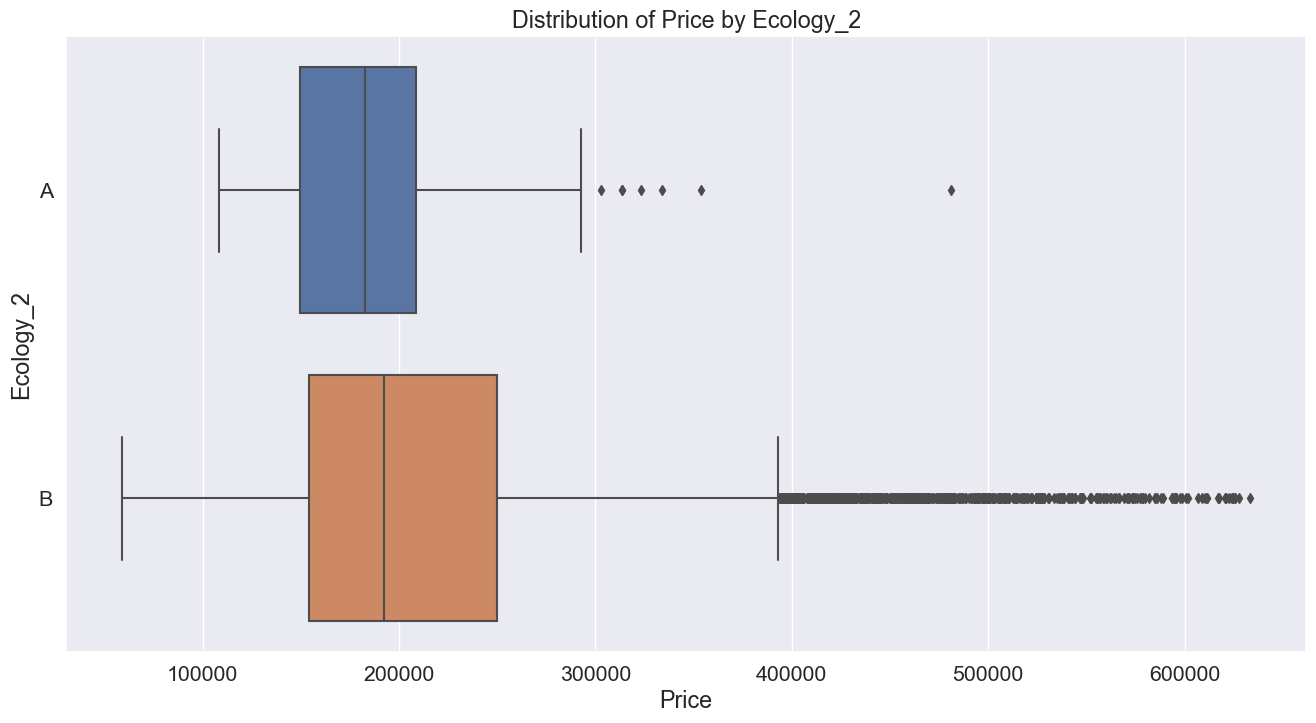

In [81]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Price'], df['Ecology_2'], whis=1.5)

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

### Violin plot

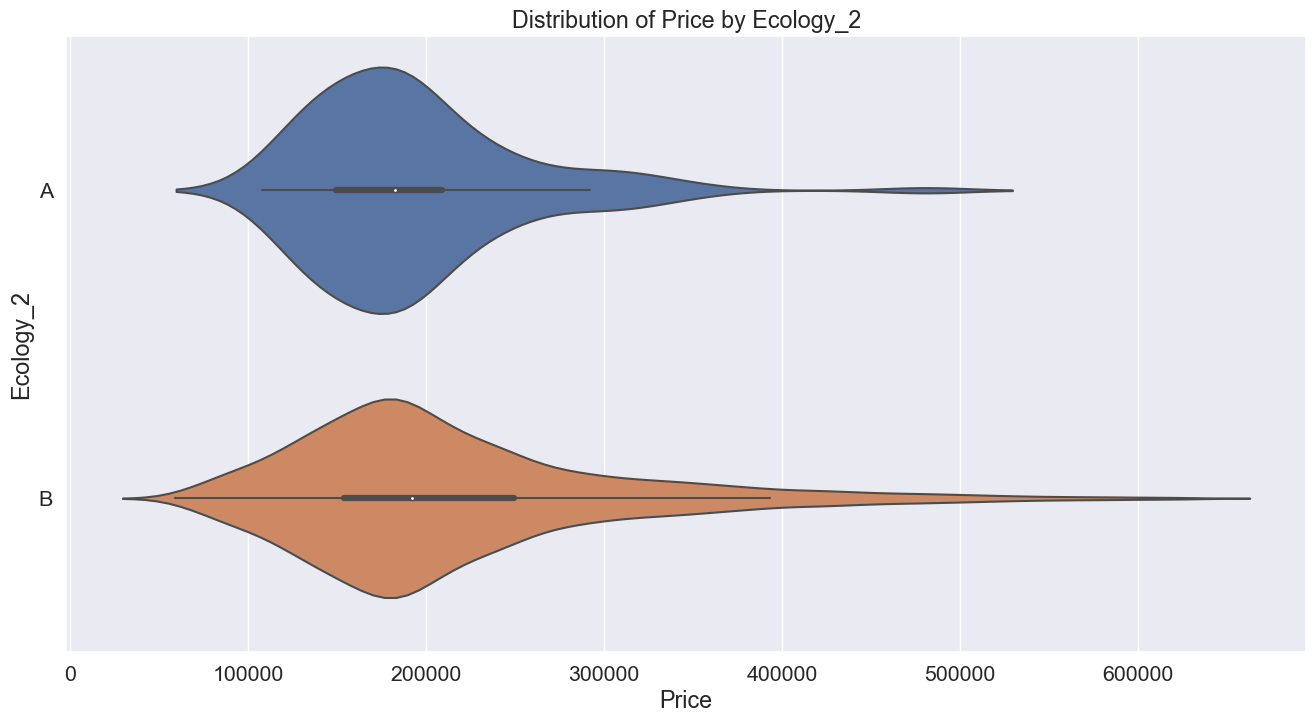

In [82]:
plt.figure(figsize=(16, 8))

sns.violinplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

### 7. Подключение библиотек и скриптов

In [83]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [84]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [85]:
REPORTS_FILE_PATH = './reports/'
SCALER_FILE_PATH = './models/scaler.pkl'
MODEL_FILE_PATH = './models/model.pkl'

### Оставим признаки, которые необходимы для модели

In [86]:
df.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [87]:
df.dtypes

DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
Ecology_2_A       float32
Ecology_2_B       float32
Ecology_3_A       float32
Ecology_3_B       float32
Shops_2_A         float32
Shops_2_B         float32
dtype: object

In [88]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,B,...,0,11,B,184966.937500,0.0,1.0,0.0,1.0,0.0,1.0
1,41,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,B,...,1,16,B,300009.437500,0.0,1.0,0.0,1.0,0.0,1.0
2,53,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,B,...,1,3,B,220925.906250,0.0,1.0,0.0,1.0,0.0,1.0
3,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,B,...,0,5,B,175616.234375,0.0,1.0,0.0,1.0,0.0,1.0
4,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,B,...,2,4,B,150226.531250,0.0,1.0,0.0,1.0,0.0,1.0


In [89]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 
                 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
                 'Ecology_3_B', 'Social_1', 'Social_2', 'Social_3', 
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_A', 'Shops_2_B']

target_name = 'Price'

In [90]:
df = df[feature_names + [target_name]]
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_A,...,Ecology_3_B,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_A,Shops_2_B,Price
0,35,2.0,47.981560,29.442751,6.0,7,9.0,1969,0.089040,0.0,...,1.0,33,7976,5,900.0,0,11,0.0,1.0,184966.937500
1,41,3.0,65.683640,40.049541,8.0,7,9.0,1978,0.000070,0.0,...,1.0,46,10309,1,240.0,1,16,0.0,1.0,300009.437500
2,53,2.0,44.947952,29.197611,0.0,8,12.0,1968,0.049637,0.0,...,1.0,34,7759,0,229.0,1,3,0.0,1.0,220925.906250
3,58,2.0,53.352982,52.731510,9.0,8,17.0,1977,0.437885,0.0,...,1.0,23,5735,3,1084.0,0,5,0.0,1.0,175616.234375
4,99,1.0,39.649193,23.776169,7.0,11,12.0,1976,0.012339,0.0,...,1.0,35,5776,1,2078.0,2,4,0.0,1.0,150226.531250


### Стандартизация признаков

In [91]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float32', 'float16']).columns.tolist()
feature_names_for_stand

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Healthcare_1',
 'Shops_2_A',
 'Shops_2_B']

In [92]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [93]:
stand_features

array([[ 0.19429916, -0.46844366, -0.44466898, ..., -0.16924   ,
        -0.29986376,  0.29986376],
       [ 1.5160621 ,  0.69507277,  0.48164657, ..., -1.0532173 ,
        -0.29986376,  0.29986376],
       [ 0.19429916, -0.6678356 , -0.46607766, ..., -1.0679502 ,
        -0.29986376,  0.29986376],
       ...,
       [-1.1274638 , -0.47124058, -0.15310913, ..., -0.16924   ,
         3.3348482 , -3.3348482 ],
       [ 0.19429916, -0.756265  , -0.06063404, ..., -0.93937176,
        -0.29986376,  0.29986376],
       [-1.1274638 , -1.0806913 , -1.1682063 , ..., -1.3344828 ,
        -0.29986376,  0.29986376]], dtype=float32)

In [94]:
stand_features.shape

(10000, 13)

In [95]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [96]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_A,...,Ecology_3_B,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_A,Shops_2_B,Price
0,35,0.194299,-0.468444,-0.444669,0.126223,7,-0.632752,1969,-0.250529,-0.09897,...,0.16816,33,7976,5,-0.169240,0,11,-0.299864,0.299864,184966.937500
1,41,1.516062,0.695073,0.481647,0.671110,7,-0.632752,1978,-0.998053,-0.09897,...,0.16816,46,10309,1,-1.053217,1,16,-0.299864,0.299864,300009.437500
2,53,0.194299,-0.667836,-0.466078,-1.508439,8,-0.135227,1968,-0.581588,-0.09897,...,0.16816,34,7759,0,-1.067950,1,3,-0.299864,0.299864,220925.906250
3,58,0.194299,-0.115393,1.589192,0.943554,8,0.693980,1977,2.680470,-0.09897,...,0.16816,23,5735,3,0.077202,0,5,-0.299864,0.299864,175616.234375
4,99,-1.127464,-1.016111,-0.939545,0.398667,11,-0.135227,1976,-0.894969,-0.09897,...,0.16816,35,5776,1,1.408526,2,4,-0.299864,0.299864,150226.531250


### 8. Разбиение на train / test

In [97]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

### 9. Построение моделей

In [98]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

### Random Forest

R2:	0.716
RMSE:	49493.669
MSE:	2449623228.045


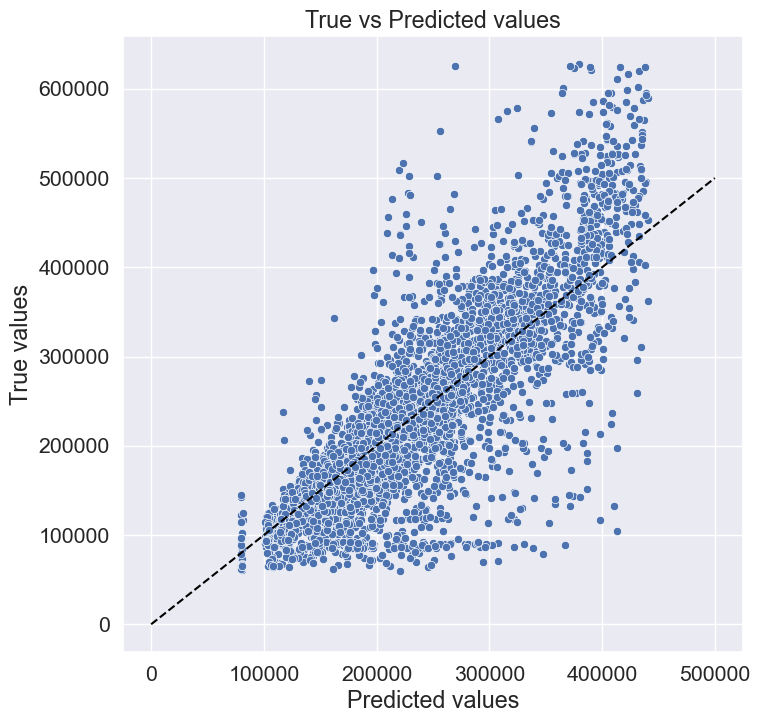

In [99]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.651
RMSE:	54829.19
MSE:	3006240081.112


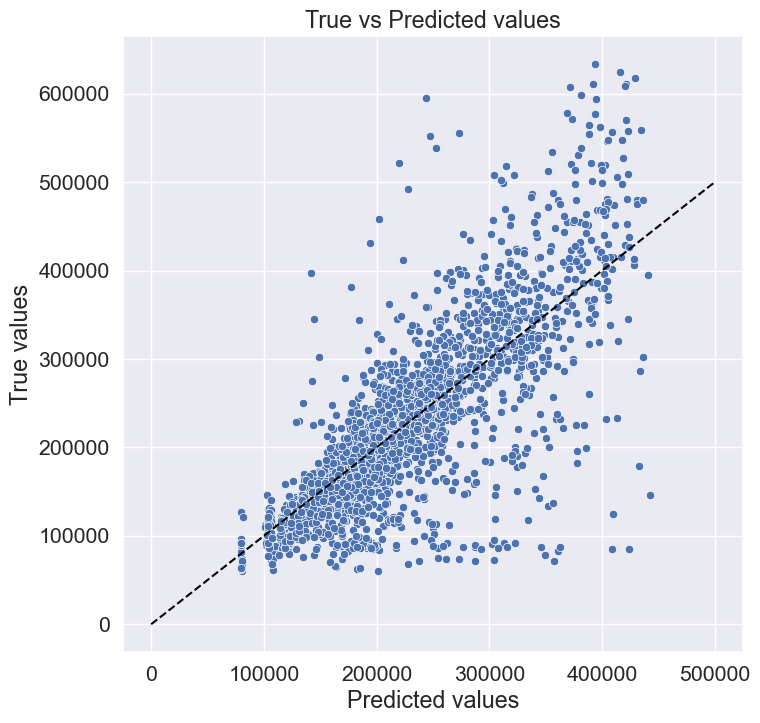

In [100]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### 10. Настройка и оценка финальной модели

In [101]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20,   
                                 min_samples_leaf=30, 
                                 # random_state=42,
                                 # n_estimators=100  
                                 )

In [102]:
%%time
params = {'n_estimators':[50, 100, 200, 400], 
          'max_depth':[3, 5, 7, 10]}

gs = GridSearchCV(rf_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

Wall time: 1min 3s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=RandomForestRegressor(criterion='mse', max_depth=20,
                                             min_samples_leaf=30),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [103]:
res = pd.DataFrame(gs.cv_results_)
res.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.558037,0.005450,0.012147,0.000851,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.482593,0.444606,0.454274,0.450108,0.518778,0.470072,0.027661,14
1,1.250519,0.144881,0.030049,0.010370,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.480441,0.443561,0.456252,0.449210,0.517329,0.469359,0.027082,16


In [104]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [105]:
gs.best_score_

0.6582344509563216

### Обучение и оценка модели

In [106]:
final_model = RandomForestRegressor(criterion='mse',
                                 max_depth=10,   
                                 min_samples_leaf=30, 
                                 random_state=42,
                                 n_estimators=100  
                                 )

final_model.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=10, min_samples_leaf=30,
                      n_estimators=200, random_state=42)

R2:	0.712
RMSE:	49838.41
MSE:	2483867126.328


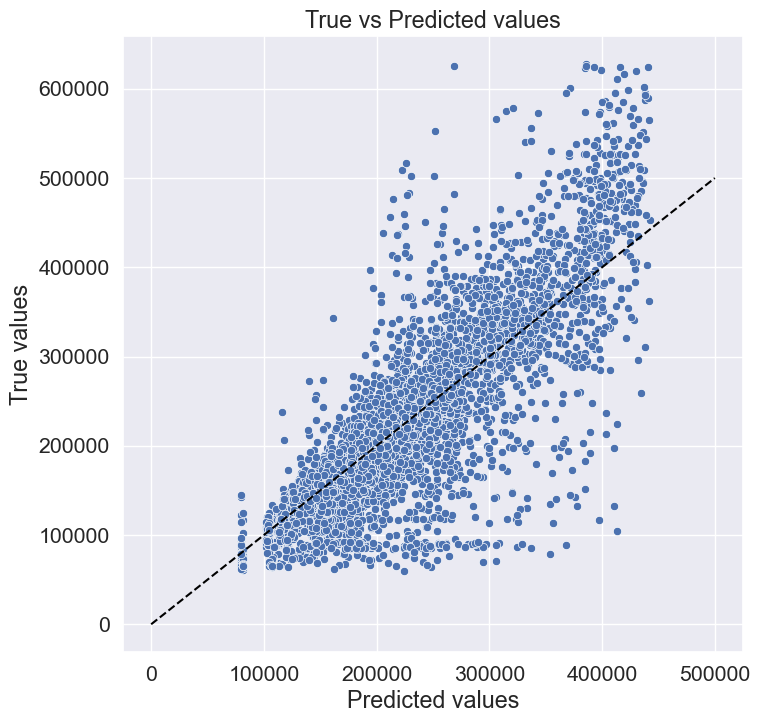

In [107]:
y_train_preds = final_model.predict(X_train)
evaluate_preds(np.squeeze(y_train.values), y_train_preds)

R2:	0.648
RMSE:	55006.329
MSE:	3025696214.982


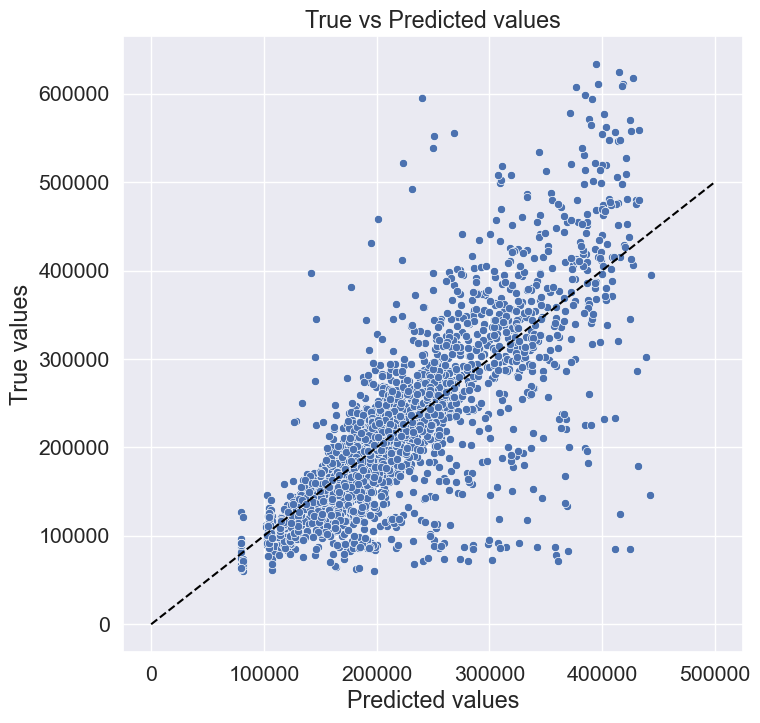

In [108]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds, save=True)

### 11. Анализ прогнозов

In [109]:
final_model.feature_importances_

array([4.11662362e-02, 2.19108129e-01, 3.48006827e-01, 3.66550878e-02,
       1.08540073e-02, 6.71126111e-03, 4.90595481e-03, 1.29078950e-02,
       2.88709869e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.09781914e-02, 1.23960777e-01, 5.77095590e-02,
       6.71434094e-03, 1.75753896e-03, 9.51739980e-03, 6.60406297e-05,
       1.09766788e-04])

In [110]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [111]:
feature_importances.head(3)

,feature_name,importance
2,Square,0.348007
1,Rooms,0.219108
14,Social_2,0.123961


In [112]:
feature_importances.tail(3)

,feature_name,importance
11,Ecology_3_A,0.0
9,Ecology_2_A,0.0
10,Ecology_2_B,0.0


In [113]:
feature_importances.to_csv(REPORTS_FILE_PATH + 'feature_importances.csv', index=False)

### 12. Сохранение модели

In [114]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

In [115]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [116]:
with open(MODEL_FILE_PATH, 'rb') as file:
    my_model = pickle.load(file)
    
my_model

RandomForestRegressor(criterion='mse', max_depth=10, min_samples_leaf=30,
                      n_estimators=200, random_state=42)

### 13. Прогнозирование на тестовом датасете

In [117]:
TEST_DATASET_PATH = './test.csv'
test_df = pd.read_csv(TEST_DATASET_PATH, sep=',')
test_df.shape

(5000, 19)

In [118]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [119]:
df.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2_A        0
Shops_2_B        0
Price            0
dtype: int64

In [120]:
pipe = DataPipeline()
pipe.fit(test_df)
test_df = pipe.transform(test_df)

In [121]:
test_df = test_df[feature_names]

In [122]:
predictions = final_model.predict(test_df)
predictions

array([290060.125481  , 227122.44938296, 423927.87170809, ...,
       317395.64457799, 222125.52359795, 322242.29512939])

In [123]:
submit = pd.read_csv('./EBurdeynaya_submission.csv')
submit.head()

,ID,Price
0,725,290833.430648
1,15856,227947.387627
2,5480,426591.753484
3,15664,361993.567741
4,14275,216647.099917


In [124]:
TO_FILL_DATASET_PATH = './test.csv'
to_fill_df = pd.read_csv(TO_FILL_DATASET_PATH, sep=',')
submit['ID'] = to_fill_df['Id']
submit['Price'] = predictions
submit.head()

,ID,Price
0,725,290060.125481
1,15856,227122.449383
2,5480,423927.871708
3,15664,361340.181373
4,14275,216545.173226


In [125]:
submit.to_csv('EBurdeynaya_submission.csv', index=False)

In [126]:
submit.shape

(5000, 2)